In [0]:
import torch,torchvision
from torch import nn,optim
from torch.utils import data as D
import matplotlib.pyplot as plt
import numpy as np

#Loading Data from torchvision predefined MNIST dataset

training_set = torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=torchvision.transforms.ToTensor())
Validation_set = torchvision.datasets.MNIST('mnist_data',train=False,download=True,transform=torchvision.transforms.ToTensor())

#Splitting the valid dataset into test and valid set(eg: valid = 70% test=30%)

val_len = int(0.7*len(Validation_set))
test_len=len(Validation_set)-(val_len)
test, valid = D.random_split(Validation_set, lengths=[test_len, val_len])


#Defining the hyper-paramater for the network model
n_batch=64
learning_rate=0.1
epoch=10
num_print=500
IMG=[]

#Passing the data through the dataloader

train_data = D.DataLoader(training_set,batch_size = n_batch)
val_data = D.DataLoader(valid,batch_size = n_batch)
test_data = D.DataLoader(test,batch_size =n_batch)

In [0]:
# from torch.autograd import Variable as var# Network Model
#Inheriting from the "Module" class for our model

class Conv_model(nn.Module):
  def __init__(self):
    super(Conv_model,self).__init__()
    
    #Defining the Convnet architecture
    
    self.CNN_LAYER_1 = nn.Conv2d(in_channels=1,out_channels=175,kernel_size=3,stride=1, padding=0,dilation = 1)  
    self.CNN_LAYER_2 = nn.Conv2d(in_channels=175,out_channels=235,kernel_size=3,stride=1, padding=0,dilation = 1)    
    self.CNN_LAYER_3 = nn.Conv2d(in_channels=235,out_channels=300,kernel_size=3,stride=1, padding=0,dilation = 1)
#     self.CNN_LAYER_4 = nn.Conv2d(in_channels=200,out_channels=250,kernel_size=3,stride=1, padding=0,dilation = 1)
#     self.CNN_LAYER_5 = nn.Conv2d(in_channels=120,out_channels=150,kernel_size=3,stride=1, padding=0,dilation = 1)
#     self.CNN_LAYER_6 = nn.Conv2d(in_channels=200,out_channels=250,kernel_size=3,stride=2, padding=1,dilation = 1)
#     self.CNN_LAYER_7 = nn.Conv2d(in_channels=70,out_channels=65,kernel_size=3,stride=1, padding=0,dilation = 1)
#     self.CNN_LAYER_8 = nn.Conv2d(in_channels=65,out_channels=60,kernel_size=3,stride=1, padding=0,dilation = 1)

#Defining the fully connected layer (at the end) for the  required classification task
    self.MAX_POOL_LAYER = nn.MaxPool2d(2)
    self.FC_LINEAR_LAYER = nn.Linear(300,10)
    self.RELU_non_linearity = nn.ReLU()

#Defining the forward pass

  def forward(self,x):
    Batch_size = x.size(0)
    x = (self.MAX_POOL_LAYER(self.RELU_non_linearity(self.CNN_LAYER_1(x))))
    x = (self.MAX_POOL_LAYER(self.RELU_non_linearity(self.CNN_LAYER_2(x))))
    x = (self.MAX_POOL_LAYER(self.RELU_non_linearity(self.CNN_LAYER_3(x))))
#     x = self.RELU_non_linearlity(self.MAX_POOL_LAYER(self.CNN_LAYER_4(x)))
#     x = self.RELU_non_linearlity(self.CNN_LAYER_5(x))
#     x = self.RELU_non_linearlity(self.CNN_LAYER_6(x))
#     x = self.RELU_non_linearlity(self.CNN_LAYER_7(x))
#     x = self.RELU_non_linearlity(self.CNN_LAYER_8(x))
    x = x.reshape(Batch_size,-1)
    x = (self.FC_LINEAR_LAYER(x))
    return x
  
def validate(model,data,e):
  
  # To get validation accuracy = (correct/total)*100.
  total = 0
  correct = 0
 
  for i,(images,labels) in enumerate(data):
    images = (images.cuda()) 
    labels=(labels.cuda())
    x = model(images)
    x=(x.cuda())        
    validation_loss=cec(x,labels)
    x=(x.cpu())
    labels=(labels.cpu())
    value,pred = torch.max(x,1)
    if e==9 and i<10:
      
      for pos in range(len(labels)):
        if labels[pos] != pred[pos]:
          images=images.cpu()
          IMG.append(images[pos])
          images=images.cuda()
    
    validation_loss=cec(x,labels).detach()
    pred.data = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)  
    ans=correct.float()*100/total
    
  return(ans,validation_loss)

#Creating an instance of the "Conv_model" class
#Convert to cuda if needed to be run on GPU

my_Conv_model = Conv_model().cuda()

#Defining the loss function for our model 
#Internally CrossEntropyLoss() applies softmax on the input.
cec = nn.CrossEntropyLoss()

# Defining the optimizer technique(i.e parameter update rule) (eg:- SGD, ADAM etc.)

optimizer = optim.SGD(my_Conv_model.parameters(),lr = learning_rate)


In [38]:
#Function to count the number of trainable parameters in our model.
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
num_parameters=count_parameters(my_Conv_model)
print('num_parameters: ', num_parameters)


num_parameters:  1009920


Epoch : 1 Batch : 500 Training Loss : 0.19016616 Validation Loss:  0.48076078 Accuracy : 95.56 % Learning rate: 0.1
Epoch : 2 Batch : 500 Training Loss : 0.14687066 Validation Loss:  0.3002781 Accuracy : 97.43 % Learning rate: 0.1
Epoch : 3 Batch : 500 Training Loss : 0.12578888 Validation Loss:  0.22868425 Accuracy : 97.9 % Learning rate: 0.05
Epoch : 4 Batch : 500 Training Loss : 0.09499726 Validation Loss:  0.17295797 Accuracy : 97.9 % Learning rate: 0.017
Epoch : 5 Batch : 500 Training Loss : 0.06947238 Validation Loss:  0.13953955 Accuracy : 97.99 % Learning rate: 0.004
Epoch : 6 Batch : 500 Training Loss : 0.03538986 Validation Loss:  0.10988641 Accuracy : 98.47 % Learning rate: 0.001
Epoch : 7 Batch : 500 Training Loss : 0.0206743 Validation Loss:  0.09857122 Accuracy : 98.63 % Learning rate: 0.0
Epoch : 8 Batch : 500 Training Loss : 0.0141658 Validation Loss:  0.09152015 Accuracy : 98.66 % Learning rate: 0.0
Epoch : 9 Batch : 500 Training Loss : 0.01358286 Validation Loss:  0.1

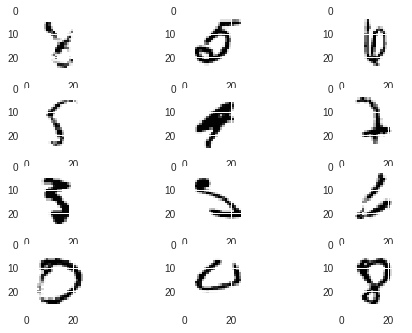

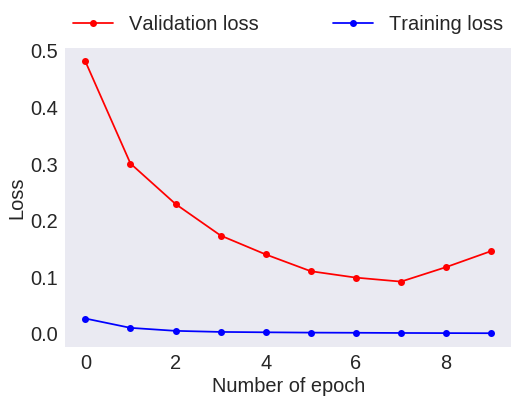

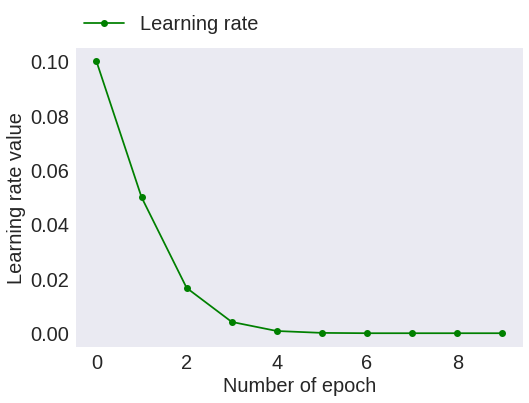

In [39]:
validation_range=[]
training_range=[]
X_axis=[]
learning_rate_range=[]

# Looping through the data for "epoch" times
for e in range(epoch):

  for i,(images,labels) in enumerate(train_data):
    images = (images.cuda())   
    labels = (labels.cuda())   
    
    #Setting all the gradient to zero for every new batch 
    optimizer.zero_grad()
    pred = my_Conv_model(images)
    #"pred" values are which we get above as random float values and needed to be in range [0,1] for comparison with the labels 
    #CrossEntropyLoss function works on the "pred" values and convert them in [0,1] such that the sum of all values =1(probability)
    loss = cec(pred,labels)
    
    #Calling the backward() function to calculate the gradient w.r.t loss
    loss.backward()
    optimizer.step()
    
    #Displaying the training/Accuracy/result only for few cases
    if (i+1) % num_print == 0:
      
      #checking the accuracy on the validation set after every batch training 
      accuracy,validation_loss = (validate(my_Conv_model,val_data,e))                                             
      print('Epoch :',e+1,'Batch :',i+1,'Training Loss :',round(float(loss.data),8),\
            'Validation Loss: ',round(float(validation_loss),8),'Accuracy :',round(float(accuracy),2),'%',\
           'Learning rate:', round(learning_rate,3))
  
  if e<5:
    learning_rate-=0.008
 
  validation_range.append((float(validation_loss)))
  X_axis.append(e)
  training_range.append((float(loss.data)))
  learning_rate_range.append(learning_rate)

#Checking the accuracy on the test set
test_set_accuracy,not_in_use=(validate(my_Conv_model,test_data,e))
print('Test_set_Accuracy: ',float(test_set_accuracy))

#Display the misclassified images
for i,r in enumerate(IMG[:12]):
  r=r.reshape(28,28)
  plt.subplot(4,3,i+1)
  plt.imshow(r)

plt.figure(2)
plt.tick_params(labelsize=20)
plt.plot(X_axis,validation_range,'r',label='Validation loss',marker='o')
plt.plot(X_axis,training_range,'b',label='Training loss',marker='o')
plt.xlabel("Number of epoch",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.,prop={'size': 20})
plt.show()

plt.figure(3)
plt.tick_params(labelsize=20)
plt.plot(X_axis,learning_rate_range,'g',label='Learning rate',marker='o')
plt.xlabel("Number of epoch",fontsize=20)
plt.ylabel("Learning rate value",fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.,prop={'size': 20})
plt.show()

In [40]:
print(len(training_set))
print(len(Validation_set))
print(60000/64)
print(28*28)
print(784*64)
print(len(train_data),len(val_data),len(test_data))

60000
10000
937.5
784
50176
938 110 47


In [41]:
print(len(test))
print(len(valid))

3000
7000
